In [1]:
import math
import numpy as np
from time import time
import scipy


from matplotlib import cm


from sklearn import svm
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import pairwise_kernels


from distributions.synthetic_distributions import TestDistribution

#import importlib
#importlib.reload(some_module)

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from SKLR import SKSVM

In [2]:
n_train=1024
n_test=5000
d=1000

distribution=TestDistribution(dim=d,index=2).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)


## Plot of Decision Surface

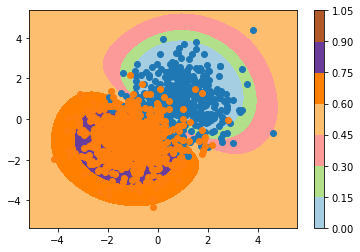

In [5]:
# decision surface for SKLR on a binary classification dataset
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from SKLR import SKSVM
# generate dataset
n_train=1000
d=2
distribution=TestDistribution(dim=d,index=1).returnDistribution()
X,y=distribution.sampling(n_train)


# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))
# define the model
model = SKSVM(sketch_method="GaussianSketch", sketch_dimension=285,lamda=10)
# fit the model
model.fit(X,y)

# make predictions for the grid
yhat_1 = model.predict(grid)


# reshape the predictions back into a grid
zz = yhat_1.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.colorbar()
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == 2*class_value-1)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
# show the plot

plt.show()



SVC(tol=0.0001)

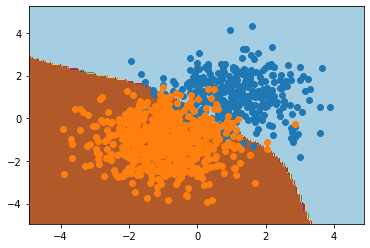

In [6]:
# decision surface for SVC on a binary classification dataset
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# generate dataset
n_train=1000
distribution=TestDistribution(dim=d,index=1).returnDistribution()
X,y=distribution.sampling(n_train)


# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))
# define the model
model_SVC=svm.SVC(tol=1e-4)
model_SVC.fit(X,y)
# make predictions for the grid
yhat = model_SVC.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == 2*class_value-1)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
# show the plot
pyplot.show()

## comparison of time and accuracy

In [7]:
from SKLR import SKSVM
import numpy as np
from distributions.synthetic_distributions import TestDistribution
from time import time

In [8]:
n_train=10000
n_test=2000
d=2
sketch_dim=100
distribution=TestDistribution(dim=d,index=1).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)

Y_prob=distribution.class_probability(X_train)

X_test,Y_test=distribution.sampling(n_test)


In [12]:
time_start=time()
model=SKSVM(sketch_method="SRHT", sketch_dimension=sketch_dim)
model.fit(X_train,Y_train)
pre_probability=model.predict(X_test)
time_end=time()
print(time_end-time_start)

30.102046251296997


In [13]:
# check
time_start=time()
model=SKSVM(sketch_method="SRHT", sketch_dimension=sketch_dim,if_jit=False)
model.fit(X_train,Y_train)
pre_probability=model.predict(X_test)
time_end=time()
print(time_end-time_start)

29.894492149353027


In [14]:
time_start=time()
model=SKSVM(sketch_method="SubsamplingSketch", sketch_dimension=sketch_dim,if_jit=False)
model.fit(X_train,Y_train)
pre_probability=model.predict(X_test)
time_end=time()
print(time_end-time_start)

1.169217824935913


In [15]:
# test error
((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()

0.916

In [16]:
# bayes error
(distribution.class_probability(X_test).max(axis=1)).mean()

0.9234102210807977

In [17]:
from sklearn import svm
time_start=time()
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)

time_end=time()
print(time_end-time_start)

SVC(probability=True)

2.7551236152648926


In [18]:
((2*(prediction_SVC.ravel()>0.5)-1)==Y_test).mean()


0.9275

In [19]:
model.iteration_

3

## Real Data

### MNIST

In [1]:
from data.mnist import mnist




In [2]:

X_train, Y_train, X_test, Y_test = mnist.load()

In [4]:
from sklearn import svm
from time import time
time_start=time()
model_SVC=svm.SVC()
model_SVC.fit(X_test, Y_test)

prediction_SVC=model_SVC.predict(X_train)

time_end=time()
print(time_end-time_start)

68.3587498664856


In [7]:
(prediction_SVC==Y_train).mean()

0.9881

In [8]:
prediction_SVC=model_SVC.predict(X_train)

### LIBSVM

In [ ]:
import dsdl


dataset_vec_notest=['australian_scale','breast-cancer_scale','colon-cancer','covtype.binary.scale','diabetes_scale', 'fourclass_scale' 'german.numer_scale', 'heart_scale', 'ionosphere', 'mushrooms', 'news20.binary', 'phishing', 'real-sim', 'skin_nonskin', 'sonar', 'abalone', 'abalone_scale', 'bodyfat', 'bodyfat_scale', 'cadata', 'cpusmall', 'cpusmall_scale',  'yacht', 'boston-housing', 'california-housing', 'concrete', 'energy', 'naval-propulsion', 'power-plant', 'digits', 'faithful']
dataset_vec_withtest=['cod-rna', 'gisette', 'leukemia', 'madelon','rcv1.binary','splice', 'svmguide1', 'svmguide3', 'w1a', 'w2a', 'w3a', 'w4a', 'w5a', 'w6a', 'w7a', 'w8a']

for dataset in dataset_vec_notest:
    ds = dsdl.load(dataset)
    X, Y = ds.get_train()
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7, test_size=0.3)
    
for dataset in dataset_vec_withtest:
    ds = dsdl.load(dataset)
    X_train, Y_train = ds.get_train()
    
    X_test, Y_test = ds.get_test()

In [ ]:
time_start=time()
model=SKSVM(sketch_method="SubsamplingSketch", sketch_dimension=sketch_dim,if_jit=False)
model.fit(X_train,Y_train)
pre_probability=model.predict(X_test)
time_end=time()
print(time_end-time_start)

In [ ]:
time_start=time()
model=SKSVM(sketch_method="SRHT", sketch_dimension=sketch_dim)
model.fit(X_train,Y_train)
pre_probability=model.predict(X_test)
time_end=time()
print(time_end-time_start)

In [ ]:
time_start=time()
model_SVC=svm.SVC()
model_SVC.fit(X_test, Y_test)

prediction_SVC=model_SVC.predict(X_train)

time_end=time()
print(time_end-time_start)

## Parameter Analysis

### Gaussian Sketch

In [29]:
n_train=2000
n_test=1000
d=2
repeat_time=10

distribution=TestDistribution(dim=d,index=1).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)

time_vec=[]
acc_vec=[]
sketch_dim_vec=[5,10,20,25,40,50,75,100,140,180,200,250,300,400,500,600,700,800]
for sketch_dim in sketch_dim_vec:
    time_temp=0
    acc_temp=0
    for _ in range(repeat_time):
        time_start=time()
        model=SKSVM(sketch_method="GaussianSketch", sketch_dimension=sketch_dim,lamda=10)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_temp+=time_end-time_start
        acc_temp+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
    time_vec.append(time_temp/repeat_time)
    acc_vec.append(acc_temp/repeat_time)

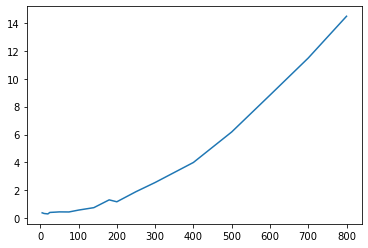

In [30]:
plt.plot(sketch_dim_vec,time_vec)

SVC(probability=True)

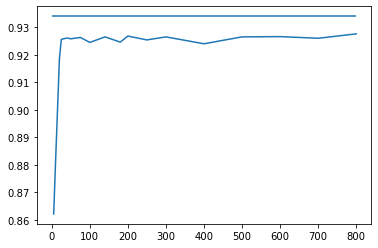

In [31]:
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)


plt.plot(sketch_dim_vec,acc_vec)
plt.hlines((prediction_SVC==Y_test).mean(),0,800)

### Count Sketch

In [32]:
n_train=8000
n_test=1000
d=2
repeat_time=10

distribution=TestDistribution(dim=d,index=1).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)

time_vec=[]
acc_vec=[]
sketch_dim_vec=[5,10,20,25,40,50,75,100,140,180,200,250,300,400,500,600,700,800]
for sketch_dim in sketch_dim_vec:
    time_temp=0
    acc_temp=0
    for _ in range(repeat_time):
        time_start=time()
        model=SKSVM(sketch_method="CountSketch", sketch_dimension=sketch_dim,lamda=10)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_temp+=time_end-time_start
        acc_temp+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
    time_vec.append(time_temp/repeat_time)
    acc_vec.append(acc_temp/repeat_time)

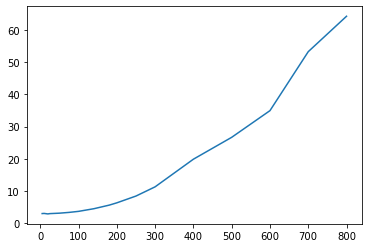

In [35]:
plt.plot(sketch_dim_vec,time_vec)

SVC(probability=True)

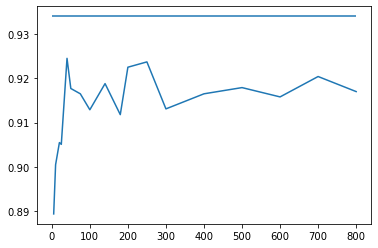

In [36]:
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)


plt.plot(sketch_dim_vec,acc_vec)
plt.hlines((prediction_SVC==Y_test).mean(),0,800)

### Subsampling Sketch

In [42]:
n_train=8000
n_test=1000
d=2
repeat_time=10

distribution=TestDistribution(dim=d,index=1).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)

time_vec=[]
acc_vec=[]
sketch_dim_vec=[10,20,25,40,50,75,100,140,180,200,250,300,400,500,600,700,800]
for sketch_dim in sketch_dim_vec:
    time_temp=0
    acc_temp=0
    for _ in range(repeat_time):
        time_start=time()
        model=SKSVM(sketch_method="SubsamplingSketch", sketch_dimension=sketch_dim,lamda=10)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_temp+=time_end-time_start
        acc_temp+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
    time_vec.append(time_temp/repeat_time)
    acc_vec.append(acc_temp/repeat_time)

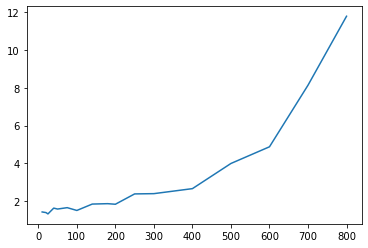

In [43]:
plt.plot(sketch_dim_vec,time_vec)

SVC(probability=True)

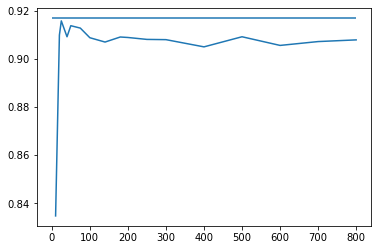

In [44]:
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)


plt.plot(sketch_dim_vec,acc_vec)
plt.hlines((prediction_SVC==Y_test).mean(),0,800)

### SRHT Sketch

In [45]:
n_train=8000
n_test=1000
d=2
repeat_time=10

distribution=TestDistribution(dim=d,index=1).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)

time_vec=[]
acc_vec=[]
sketch_dim_vec=[5,10,20,25,40,50,75,100,140,180,200,250,300,400,500,600,700,800]
for sketch_dim in sketch_dim_vec:
    time_temp=0
    acc_temp=0
    for _ in range(repeat_time):
        time_start=time()
        model=SKSVM(sketch_method="SRHT", sketch_dimension=sketch_dim,lamda=10)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_temp+=time_end-time_start
        acc_temp+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
    time_vec.append(time_temp/repeat_time)
    acc_vec.append(acc_temp/repeat_time)

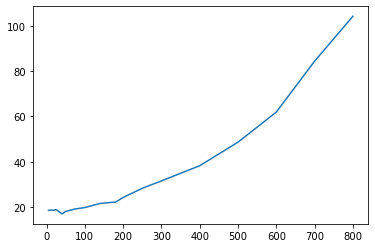

In [46]:
plt.plot(sketch_dim_vec,time_vec)

SVC(probability=True)

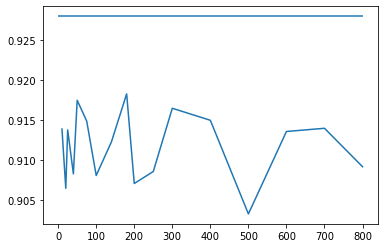

In [48]:
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)


plt.plot(sketch_dim_vec[1:],acc_vec[1:])
plt.hlines((prediction_SVC==Y_test).mean(),0,800)

### Overparametrization

In [3]:
n_train=5000
n_test=1000
d=2
repeat_time=5

distribution=TestDistribution(dim=d,index=2).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)

time_vec=[]
acc_vec=[]
sketch_dim_vec=[i for i in range(5,400,30)]
for sketch_dim in sketch_dim_vec:
    print(sketch_dim)
    time_temp=0
    acc_temp=0
    for _ in range(repeat_time):
        time_start=time()
        model=SKSVM(sketch_method="CountSketch", sketch_dimension=sketch_dim,lamda=0.01)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_temp+=time_end-time_start
        acc_temp+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
    time_vec.append(time_temp/repeat_time)
    acc_vec.append(acc_temp/repeat_time)

5
35
65
95
125
155
185
215
245
275
305
335
365
395


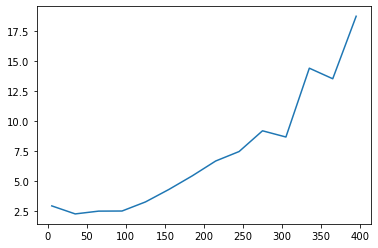

In [4]:
plt.plot(sketch_dim_vec,time_vec)

SVC(probability=True)

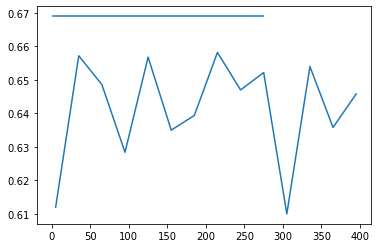

In [5]:
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)


plt.plot(sketch_dim_vec,acc_vec)
plt.hlines((prediction_SVC==Y_test).mean(),0,275)

## Parameter Analysis for lambda

## Easy Distribution

In [99]:
n_train=2000
n_test=1000
d=2
repeat_time=30

distribution=TestDistribution(dim=d,index=1).returnDistribution()


lamda_vec=[i for i in np.logspace(-4,8,36)]
time_vec=np.zeros((repeat_time,len(lamda_vec)))
acc_vec=np.zeros((repeat_time,len(lamda_vec)))
svm_vec=[]

for lamda_idx,lamda in enumerate(lamda_vec):
    print(lamda)
    for j in range(repeat_time):
        
        np.random.seed(j)
        X_train,Y_train=distribution.sampling(n_train)
        X_test,Y_test=distribution.sampling(n_test)
        time_start=time()
        model=SKSVM(sketch_method="GaussianSketch",lamda=lamda,sketch_dimension=50)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_vec[j,lamda_idx]+=time_end-time_start
        acc_vec[j,lamda_idx]+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
        
        model_SVC=svm.SVC(tol=1e-3,probability=True)
        _=model_SVC.fit(X_train,Y_train)
        prediction_SVC=model_SVC.predict(X_test)
        svm_vec.append((prediction_SVC==Y_test).mean())

0.0001
0.0002202201949987376
0.00048496934285282005
0.0010680004325145755
0.002351952635070959
0.005179474679231213
0.011406249238513202
0.025118864315095794
0.05531681197617227
0.1218187912010116
0.26826957952797276
0.5907837911587943
1.3010252169108303
2.8651202696637816
6.30957344480193
13.894954943731388
30.59949687207196
67.3862716803094
148.3981788967566
326.80275894101254
719.6856730011528
1584.893192461114
3490.2548789595794
7686.246100397746
16926.66615037873
37275.93720314938
82089.14159638261
180776.8676963438
398107.1705534969
876712.3872968686
1930697.7288832536
4251786.303382886
9363292.088239416
20619860.095022235
45409096.1097247
100000000.0


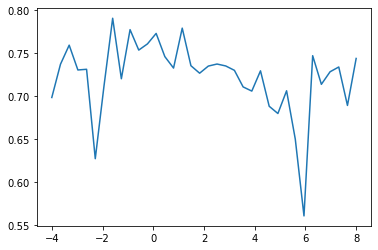

In [101]:
plt.plot(np.log10(lamda_vec),time_vec.mean(axis=0))

SVC(probability=True)

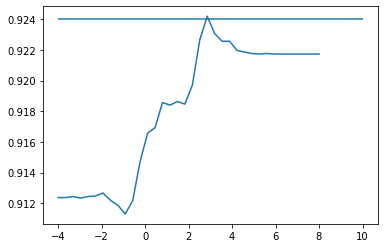

In [102]:
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)


plt.plot(np.log10(lamda_vec),acc_vec.mean(axis=0))
plt.hlines((prediction_SVC==Y_test).mean(),-4,10)

<ErrorbarContainer object of 3 artists>

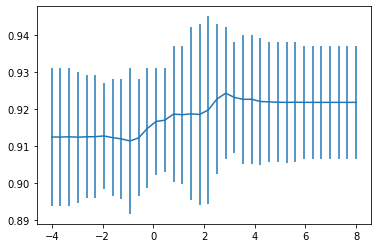

In [103]:
err_up=acc_vec.max(axis=0)-acc_vec.mean(axis=0)
err_low=acc_vec.max(axis=0)-acc_vec.mean(axis=0)
err=np.array([err_low,err_up])

plt.errorbar(np.log10(lamda_vec),acc_vec.mean(axis=0),yerr=err)

<ErrorbarContainer object of 3 artists>

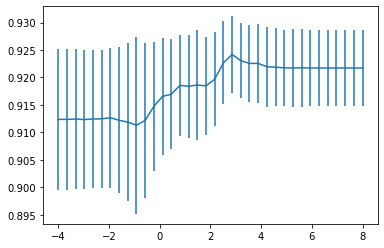

In [104]:

err=acc_vec.std(axis=0)

plt.errorbar(np.log10(lamda_vec),acc_vec.mean(axis=0),yerr=err)

## Hard Distribution

In [116]:
n_train=2000
n_test=1000
d=2
repeat_time=30

distribution=TestDistribution(dim=d,index=1).returnDistribution()


lamda_vec=[i for i in np.logspace(-4,8,48)]
time_vec=np.zeros((repeat_time,len(lamda_vec)))
acc_vec=np.zeros((repeat_time,len(lamda_vec)))
svm_vec=[]

for lamda_idx,lamda in enumerate(lamda_vec):
    print(lamda)
    for j in range(repeat_time):
        
        np.random.seed(j)
        X_train,Y_train=distribution.sampling(n_train)
        X_test,Y_test=distribution.sampling(n_test)
        time_start=time()
        model=SKSVM(sketch_method="GaussianSketch",lamda=lamda,sketch_dimension=50)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_vec[j,lamda_idx]+=time_end-time_start
        acc_vec[j,lamda_idx]+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
        
        model_SVC=svm.SVC(tol=1e-3,probability=True)
        _=model_SVC.fit(X_train,Y_train)
        prediction_SVC=model_SVC.predict(X_test)
        svm_vec.append((prediction_SVC==Y_test).mean())

0.0001
0.00018001933328915445
0.0003240696035787167
0.0005833879397552116
0.0010502110796366659
0.0018905829836907567
0.003403414882518307
0.006126804780573316
0.011029433117916125
0.019855111964445806
0.03574304018221048
0.06434438263328988
0.11583232862547103
0.20852058572487536
0.37537736819256035
0.6757518355386216
1.21648394902585
2.1899062946059127
3.9422547112067905
7.096820647674745
12.775649214671128
22.998638539612063
41.40199576459216
74.53159674382277
134.17128354799115
241.53425010859465
434.8083467104509
782.7390868337488
1409.0816855117303
2536.619455757797
4566.405432338163
8220.412614574892
14798.331982375272
26639.858572587676
47956.89579154599
86331.68407011566
155413.72208032137
279774.74632885394
503648.6330526259
906664.9113412772
1632172.1285632704
2938225.383971
5289373.746757292
9521895.354084047
17141252.53291307
30857568.52716041
55549589.13183813
100000000.0


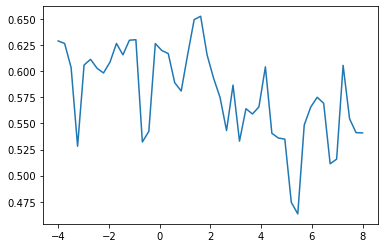

In [117]:
plt.plot(np.log10(lamda_vec),time_vec.mean(axis=0))

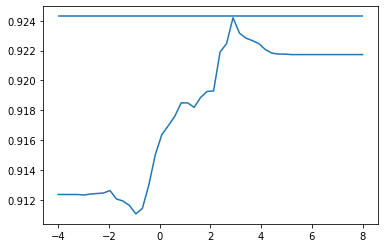

In [118]:
plt.plot(np.log10(lamda_vec),acc_vec.mean(axis=0))
plt.hlines(np.array(svm_vec).mean(),-4,8)

<ErrorbarContainer object of 3 artists>

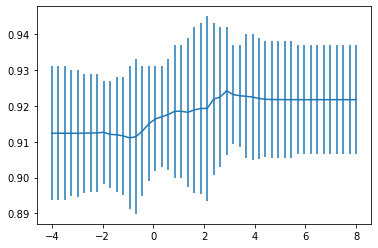

In [119]:
err_up=acc_vec.max(axis=0)-acc_vec.mean(axis=0)
err_low=acc_vec.max(axis=0)-acc_vec.mean(axis=0)
err=np.array([err_low,err_up])

plt.errorbar(np.log10(lamda_vec),acc_vec.mean(axis=0),yerr=err)

<ErrorbarContainer object of 3 artists>

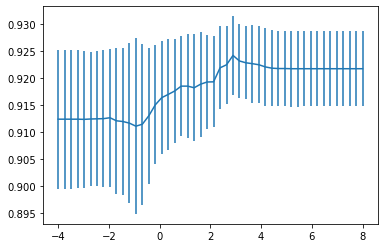

In [120]:

err=acc_vec.std(axis=0)

plt.errorbar(np.log10(lamda_vec),acc_vec.mean(axis=0),yerr=err)

## Interaction of lambda and sketch dimension on accuracy

## easy distribution

In [57]:
# generate grid
n_train=5000
n_test=1000
d=2
repeat_time=10

distribution=TestDistribution(dim=d,index=1).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)
X_test,Y_test=distribution.sampling(n_test)



lamda_vec=[i for i in np.linspace(-3,2,10)]
sketch_dim_vec=[ int(n_train**i) for i in np.linspace(0.15,0.67,15)]

axis1,axis2=np.meshgrid(lamda_vec,sketch_dim_vec)
params=np.array([axis1.ravel(),axis2.ravel()]).T

time_vec=np.array([])
acc_vec=np.array([])
for i in range(params.shape[0]):
    if 100*i % int(params.shape[0])==0:
        print((i,params.shape[0]))
    time_sum=0
    acc_sum=0
    for j in range(repeat_time):
        np.random.seed(i*j+i+j)
        X_train,Y_train=distribution.sampling(n_train)
        X_test,Y_test=distribution.sampling(n_test)
        time_start=time()
        model=SKSVM(sketch_method="GaussianSketch",lamda=10**params[i,0],sketch_dimension=int(params[i,1]),random_state=i*j+i+j)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_sum+=time_end-time_start
        acc_sum+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
    time_vec=np.append(time_vec,time_sum)
    acc_vec=np.append(acc_vec,acc_sum)

time_vec=time_vec.reshape(-1,len(lamda_vec))
acc_vec=acc_vec.reshape(-1,len(lamda_vec))


(0, 150)
(3, 150)
(6, 150)
(9, 150)
(12, 150)
(15, 150)
(18, 150)
(21, 150)
(24, 150)
(27, 150)
(30, 150)
(33, 150)
(36, 150)
(39, 150)
(42, 150)
(45, 150)
(48, 150)
(51, 150)
(54, 150)
(57, 150)
(60, 150)
(63, 150)
(66, 150)
(69, 150)
(72, 150)
(75, 150)
(78, 150)
(81, 150)
(84, 150)
(87, 150)
(90, 150)
(93, 150)
(96, 150)
(99, 150)
(102, 150)
(105, 150)
(108, 150)
(111, 150)
(114, 150)
(117, 150)
(120, 150)
(123, 150)
(126, 150)
(129, 150)
(132, 150)
(135, 150)
(138, 150)
(141, 150)
(147, 150)


Text(0.5, 1.0, 'Time')

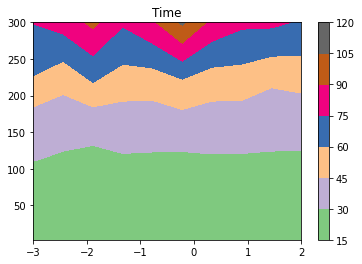

In [58]:
plt.contourf(axis1, axis2,time_vec ,cmap=plt.cm.Accent)
plt.colorbar()
plt.title("Time")

Text(0.5, 1.0, 'Accuracy')

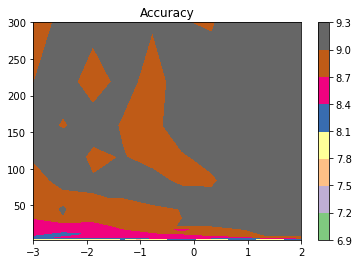

In [59]:
plt.contourf(axis1, axis2,acc_vec ,cmap=plt.cm.Accent)
plt.colorbar()
plt.title("Accuracy")

In [95]:
1

1

## hard distribution

In [60]:
# generate grid
n_train=5000
n_test=1000
d=2
repeat_time=10

distribution=TestDistribution(dim=d,index=2).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)
X_test,Y_test=distribution.sampling(n_test)



lamda_vec=[i for i in np.linspace(-2,4,12)]
sketch_dim_vec=[ int(n_train**i) for i in np.linspace(0.15,0.67,15)]

axis1,axis2=np.meshgrid(lamda_vec,sketch_dim_vec)
params=np.array([axis1.ravel(),axis2.ravel()]).T

time_vec=np.array([])
acc_vec=np.array([])
for i in range(params.shape[0]):
    if 100*i % int(params.shape[0])==0:
        print((i,params.shape[0]))
    time_sum=0
    acc_sum=0
    for j in range(repeat_time):
        np.random.seed(i*j+i+j)
        X_train,Y_train=distribution.sampling(n_train)
        X_test,Y_test=distribution.sampling(n_test)
        time_start=time()
        model=SKSVM(sketch_method="GaussianSketch",lamda=10**params[i,0],sketch_dimension=int(params[i,1]),random_state=i*j+i+j)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_sum+=time_end-time_start
        acc_sum+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
    time_vec=np.append(time_vec,time_sum)
    acc_vec=np.append(acc_vec,acc_sum)

time_vec=time_vec.reshape(-1,len(lamda_vec))
acc_vec=acc_vec.reshape(-1,len(lamda_vec))


(0, 180)
(9, 180)
(18, 180)
(27, 180)
(36, 180)
(45, 180)
(54, 180)
(63, 180)
(72, 180)
(81, 180)
(90, 180)
(99, 180)
(108, 180)
(117, 180)
(126, 180)
(135, 180)
(144, 180)
(153, 180)
(162, 180)
(171, 180)


In [61]:
1

1

Text(0.5, 1.0, 'Time')

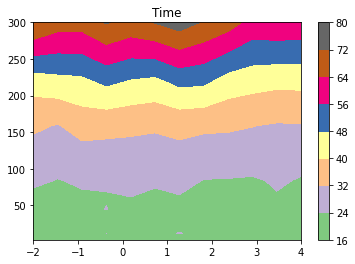

In [62]:
plt.contourf(axis1, axis2,time_vec ,cmap=plt.cm.Accent)
plt.colorbar()
plt.title("Time")

Text(0.5, 1.0, 'Accuracy')

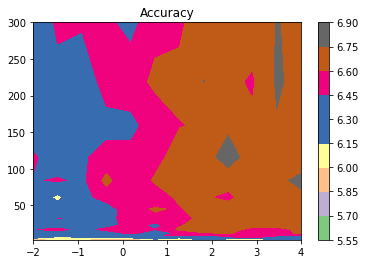

In [63]:
plt.contourf(axis1, axis2,acc_vec ,cmap=plt.cm.Accent)
plt.colorbar()
plt.title("Accuracy")

## Simulation

In [135]:
n_train_vec=[100+200*i for i in range(10)]
n_test=1000
d=2
repeat_time=10

distribution=TestDistribution(dim=d,index=2).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)


time_vec=np.zeros((repeat_time,len(n_train_vec)))
acc_vec=np.zeros((repeat_time,len(n_train_vec)))

for n_train_idx,n_train in enumerate(n_train_vec):
    print(n_train)
    sketch_dim=int(3*n_train**(1/3))
    print(sketch_dim)
    for j in range(repeat_time):
        time_start=time()
        model=SKSVM(sketch_method="GaussianSketch",lamda=10,sketch_dimension=sketch_dim)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_vec[j,n_train_idx]+=time_end-time_start
        acc_vec[j,n_train_idx]+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
   

100
13
300
20
500
23
700
26
900
28
1100
30
1300
32
1500
34
1700
35
1900
37


<ErrorbarContainer object of 3 artists>

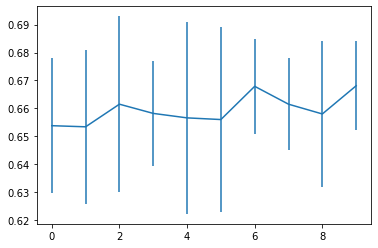

In [134]:
err_up=acc_vec.max(axis=0)-acc_vec.mean(axis=0)
err_low=acc_vec.max(axis=0)-acc_vec.mean(axis=0)
err=np.array([err_low,err_up])
plt.errorbar(x=np.arange(len(n_train_vec)),y=acc_vec.mean(axis=0),yerr=err)